In [2]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import json
f = open('../config/pair_list.json',)
pairJson = json.load(f)
f.close()

In [3]:
pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2021-01-01T00:00:00'

#dataEngine = DataEngine(session=ccxt.hitbtc())
dataEngine = DataEngine(session=ccxt.binance(), path_to_data='./database/')

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 10272 candles for AVAXUSDT
Successfully load 10272 candles for SOLUSDT
Successfully load 10272 candles for ATOMUSDT
Successfully load 10272 candles for LUNAUSDT
Successfully load 10272 candles for BNBUSDT
Successfully load 10272 candles for FTTUSDT
Successfully load 10272 candles for DOTUSDT
Successfully load 10272 candles for BTCUSDT
Successfully load 10272 candles for ETHUSDT
Successfully load 10272 candles for LTCUSDT
Successfully load 10272 candles for XRPUSDT
Successfully load 10272 candles for RUNEUSDT
Successfully load 10272 candles for LINKUSDT
Successfully load 10272 candles for DOGEUSDT
Successfully load 10272 candles for BCHUSDT
Successfully load 10272 candles for SUSHIUSDT
Successfully load 10272 candles for SRMUSDT
Successfully load 10272 candles for TRXUSDT
Successfully load 10272 candles for AAVEUSDT
Data load 100%


,open,high,low,close,volume
timestamp,,,,,
2021-01-01 00:00:00,3.1859,3.2609,3.0405,3.2461,345801.16
2021-01-01 01:00:00,3.2492,3.2590,3.1371,3.1709,114929.77
2021-01-01 02:00:00,3.1710,3.1723,3.0178,3.0891,296991.80
2021-01-01 03:00:00,3.0868,3.1236,3.0837,3.1085,13442.67
2021-01-01 04:00:00,3.1123,3.1165,3.0854,3.0901,21276.68
...,...,...,...,...,...
2022-03-05 08:00:00,77.2000,77.9200,76.6000,77.5400,100448.69
2022-03-05 09:00:00,77.5400,77.7100,76.7300,77.1800,85569.65
2022-03-05 10:00:00,77.1800,77.2600,76.3600,77.1700,89996.83


In [4]:
# -- Indicator variable --
stochWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --    
    df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=7)
    df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=30)
    df['EMA3']=ta.trend.ema_indicator(close=df['close'], window=50)
    df['EMA4']=ta.trend.ema_indicator(close=df['close'], window=100)
    df['EMA5']=ta.trend.ema_indicator(close=df['close'], window=121)
    df['EMA6']=ta.trend.ema_indicator(close=df['close'], window=200)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow, smooth1=3, smooth2=3)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,STOCH_RSI
timestamp,,,,,,,,,,,,
2021-01-01 00:00:00,3.1859,3.2609,3.0405,3.2461,345801.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,3.2492,3.2590,3.1371,3.1709,114929.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,3.1710,3.1723,3.0178,3.0891,296991.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,3.0868,3.1236,3.0837,3.1085,13442.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,3.1123,3.1165,3.0854,3.0901,21276.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-05 08:00:00,77.2000,77.9200,76.6000,77.5400,100448.69,76.256574,77.317658,78.386844,79.674771,79.844771,80.026940,1.000000
2022-03-05 09:00:00,77.5400,77.7100,76.7300,77.1800,85569.65,76.487430,77.308777,78.339517,79.625370,79.801086,79.998612,0.921913
2022-03-05 10:00:00,77.1800,77.2600,76.3600,77.1700,89996.83,76.658073,77.299823,78.293654,79.576748,79.757954,79.970467,0.919661


In [4]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2021-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
showLog = False

# -- Hyper parameters --
stochOverBought = 0.85
maxPositions = 5

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['EMA1'] > row['EMA2']
        and row['EMA2'] > row['EMA3']
        and row['EMA3'] > row['EMA4']
        and row['EMA4'] > row['EMA5']
        and row['EMA5'] > row['EMA6']
        and row['STOCH_RSI'] < stochOverBought
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if row['EMA2'] > row['EMA1']:
        return True
    else:
        return False
            

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    # if StopLossActivation:
                    #    stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    #if takeProfitActivation:
                    #    takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    # if showLog:
                    #     print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 13815.94512340628


In [5]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 17 coins | Timeframe : 1h
Period : [2021-01-01 00:00:00] -> [2022-02-16 22:00:00]
Starting balance : 999.7666666666667 $

----- General Informations -----
Final balance : 13815.95 $
Performance vs US Dollar : 1281.92 %
Bitcoin Buy and Hold Performence : 2852.77 %
Performance vs Buy and Hold : -53.2 %
Best trade : +74.96 %, the 2021-01-30 09:00:00
Worst trade : -9.34 %, the 2021-12-04 07:00:00
Worst drawDown : - 40.28 %
Total fees :  3476.25 $

----- Trades Informations -----
Total trades on period : 568
Number of positive trades : 235
Number of negative trades :  333
Trades win rate ratio : 41.37 %
Average trades performance : 0.58 %
Average positive trades : 3.21 %
Average negative trades : -1.27 %

----- Trades Reasons -----
Buy Market Order     571
Sell Market Order    568
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade  

In [6]:
newDf.iloc[-5:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct
date,,,,,,,,,,,,,,,
2022-02-15 13:00:00,2022-02-15 13:00:00,XRP/USDT,Buy,Buy Market Order,0.8307,3.238880,0.000000,5566.067243,13879.293943,NaN,NaN,,21560.623216,7681.329273,0.356267
2022-02-16 18:00:00,2022-02-16 18:00:00,XRP/USDT,Sell,Sell Market Order,0.8241,3.210897,4583.785118,0.000000,13839.347002,-39.946941,-0.287817,Bad,21560.623216,7721.276214,0.358119
2022-02-16 18:00:00,2022-02-16 18:00:00,AVAX/USDT,Buy,Buy Market Order,92.9500,3.208650,0.000000,49.280005,13836.138352,NaN,NaN,,21560.623216,7724.484863,0.358268
2022-02-16 19:00:00,2022-02-16 19:00:00,BCH/USDT,Sell,Sell Market Order,336.0000,3.230399,4611.625855,0.000000,13819.173262,-16.965091,-0.122614,Bad,21560.623216,7741.449954,0.359055
2022-02-16 19:00:00,2022-02-16 19:00:00,FTT/USDT,Buy,Buy Market Order,46.8100,3.228138,0.000000,98.449001,13815.945123,NaN,NaN,,21560.623216,7744.678092,0.359205


----- 2021 Performances: 1647.25% -----


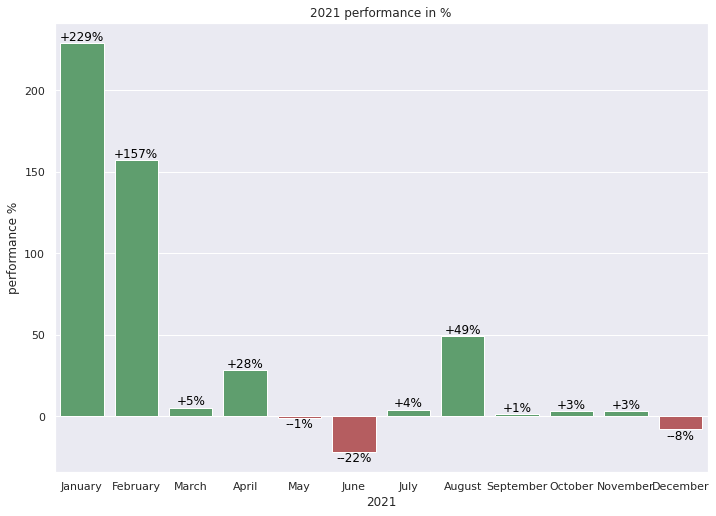

----- 2022 Performances: -19.64% -----


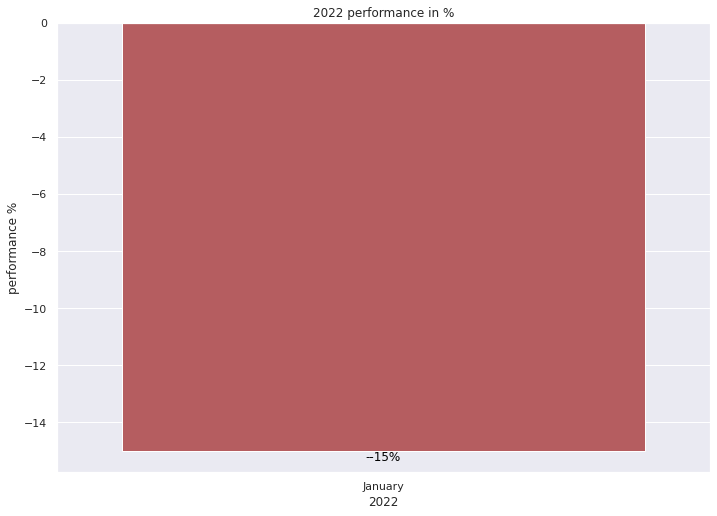

In [7]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)


----- Plot -----


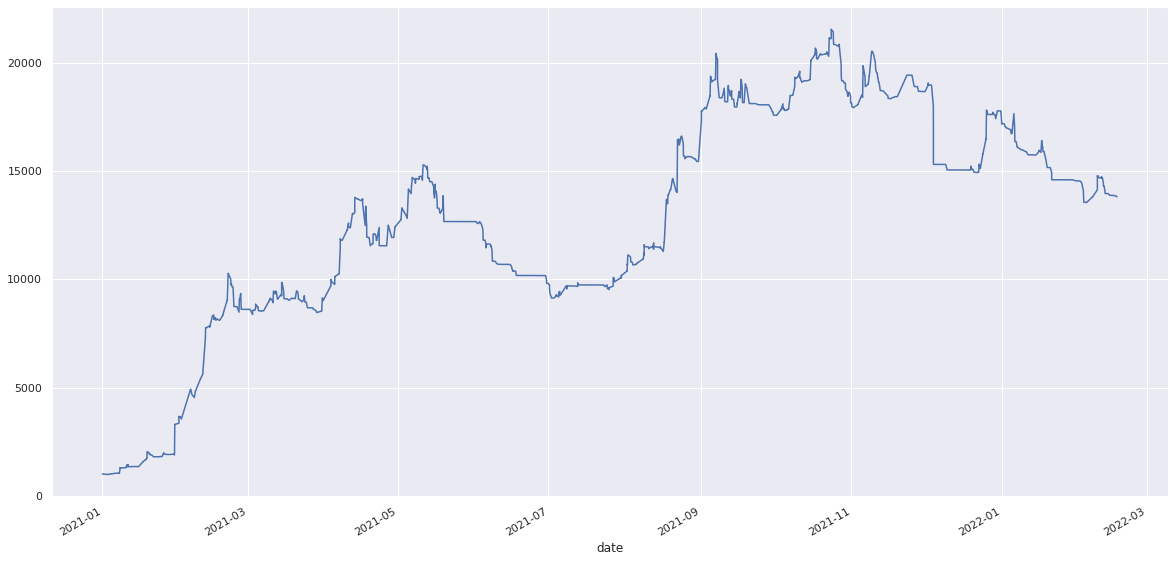

In [8]:
BTobject.plot_wallet_evolution(dfTrades=dfTrades)

In [9]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
1129,2022-02-12 01:00:00,AVAX/USDT,Sell,Sell Market Order,83.8600,3.101478,13970.509419,0.000000,13970.509419
1130,2022-02-13 06:00:00,XRP/USDT,Buy,Buy Market Order,0.8315,3.259786,9311.499755,5599.218133,13967.249633
1131,2022-02-13 20:00:00,XRP/USDT,Sell,Sell Market Order,0.8181,3.206504,13889.013606,0.000000,13889.013606
1132,2022-02-15 08:00:00,BCH/USDT,Buy,Buy Market Order,337.0000,3.240770,9257.181891,13.734691,13885.772836
1133,2022-02-15 13:00:00,BNB/USDT,Buy,Buy Market Order,431.4000,3.240014,4626.970939,10.725477,13882.532822
1134,2022-02-15 13:00:00,XRP/USDT,Buy,Buy Market Order,0.8307,3.238880,0.000000,5566.067243,13879.293943
1135,2022-02-16 18:00:00,XRP/USDT,Sell,Sell Market Order,0.8241,3.210897,4583.785118,0.000000,13839.347002
1136,2022-02-16 18:00:00,AVAX/USDT,Buy,Buy Market Order,92.9500,3.208650,0.000000,49.280005,13836.138352
1137,2022-02-16 19:00:00,BCH/USDT,Sell,Sell Market Order,336.0000,3.230399,4611.625855,0.000000,13819.173262
1138,2022-02-16 19:00:00,FTT/USDT,Buy,Buy Market Order,46.8100,3.228138,0.000000,98.449001,13815.945123
